In [1]:
import os
import pandas as pd
import numpy as np 


from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

#HIERARCHICAL TREE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import jaccard_similarity_score, pairwise_distances, accuracy_score
#MINIMUN SPANNING TREE
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree, connected_components

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('/processing_Data/antibioticos/mperezv/ANALYSIS/OUTBREAK_COVID/chewbbaca/cgMLST/cgMLST.tsv', sep='\t', index_col=0)

In [3]:
df.head()

KP1_RS00005.fasta  KP1_RS00010.fasta  KP1_RS00015.fasta  \
FILE                                                                    
K12591.fasta                  1                 34                  2   
K12592.fasta                  1                 34                  2   
K12593.fasta                  1                 34                  2   
K12594.fasta                  1                 34                  2   
K12595.fasta                  1                 34                  2   

              KP1_RS00020.fasta  KP1_RS00025.fasta  KP1_RS00035.fasta  \
FILE                                                                    
K12591.fasta                 94                 18                  1   
K12592.fasta                 94                 18                  1   
K12593.fasta                 94                 18                  1   
K12594.fasta                 94                 18                  1   
K12595.fasta                 94                 18                  1   

              KP1_RS00040.fasta  KP1_RS00045.fasta  KP1_RS00050.fasta  \
FILE                                                                    
K12591.fasta                 56                 34                  2   
K12592.fasta                 56                 34                  2   
K12593.fasta                 56                 34                  2   
K12594.fasta                 56                 34                  2   
K12595.fasta                 56                 34                  2   

              KP1_RS00055.fasta  KP1_RS00060.fasta  KP1_RS00065.fasta  \
FILE                                                                    
K12591.fasta                513                 57                 78   
K12592.fasta                513                 57                 78   
K12593.fasta                513                 57                 78   
K12594.fasta                513                 57                 78   
K12595.fasta                513                 57                 78   

              KP1_RS00070.fasta  KP1_RS00105.fasta  KP1_RS00115.fasta  \
FILE                                                                    
K12591.fasta                 60                  1                  4   
K12592.fasta                 60                  1                  4   
K12593.fasta                 60                  1                  4   
K12594.fasta                 60                  1                  4   
K12595.fasta                 60                  1                  4   

              KP1_RS00120.fasta  KP1_RS00125.fasta  KP1_RS00135.fasta  \
FILE                                                                    
K12591.fasta                 39                118                  8   
K12592.fasta                 39                118                  8   
K12593.fasta                 39                118                  8   
K12594.fasta                 39                118                  8   
K12595.fasta                 39                118                  8   

              KP1_RS00140.fasta  KP1_RS00145.fasta  KP1_RS00150.fasta  \
FILE                                                                    
K12591.fasta                 93                 98                 46   
K12592.fasta                 93                 98                 46   
K12593.fasta                 93                 98                 46   
K12594.fasta                 93                 98                 46   
K12595.fasta                 93                 98                 46   

              KP1_RS00155.fasta  KP1_RS00165.fasta  KP1_RS00175.fasta  \
FILE                                                                    
K12591.fasta                 31                  8                 44   
K12592.fasta                 31                  8                 44   
K12593.fasta                 31                  8                 44   
K12594.fasta                 31                  8               

In [11]:
#dft = df.iloc[:10,:5]

In [19]:
df.index = df.index.str.replace('.fasta', '')
df.columns = df.columns.str.replace('.fasta', '')
#distance_df = distance_df.rename_axis(None)
df.index.name = None

In [20]:
df.shape

(28, 2270)

In [22]:
df.iloc[:,:20]

,KP1_RS00005,KP1_RS00010,KP1_RS00015,KP1_RS00020,KP1_RS00025,KP1_RS00035,KP1_RS00040,KP1_RS00045,KP1_RS00050,KP1_RS00055,KP1_RS00060,KP1_RS00065,KP1_RS00070,KP1_RS00105,KP1_RS00115,KP1_RS00120,KP1_RS00125,KP1_RS00135,KP1_RS00140,KP1_RS00145
K12591,1,34,2,94,18,1,56,34,2,513,57,78,60,1,4,39,118,8,93,98
K12592,1,34,2,94,18,1,56,34,2,513,57,78,60,1,4,39,118,8,93,98
K12593,1,34,2,94,18,1,56,34,2,513,57,78,60,1,4,39,118,8,93,98
K12594,1,34,2,94,18,1,56,34,2,513,57,78,60,1,4,39,118,8,93,98
K12595,1,34,2,94,18,1,56,34,2,513,57,78,60,1,4,39,118,8,93,98
K12596,1,34,2,94,18,1,56,34,2,513,57,78,60,1,4,39,118,8,93,98
K12597,23,1,2,40,41,1,27,32,25,538,40,105,29,1,4,37,46,8,40,41
K12598,23,1,2,40,41,1,27,32,25,538,40,105,29,1,4,37,46,8,40,41
K12599,23,1,2,40,41,1,27,32,25,538,40,105,29,1,4,37,46,8,40,41
K12600,1,34,2,94,18,1,56,34,2,513,57,78,60,1,4,39,118,8,93,98


In [23]:
def distance_matrix(df, output_file):
    hamming_distance = pairwise_distances(df, metric = "hamming")
    distance_df = pd.df(hamming_distance * len(df.columns), index=df.index, columns=df.index) #Add index
    distance_df = distance_df.astype(int)
    distance_df.to_csv(output_file, sep='\t', index=True)

In [24]:
hamming_distance = pairwise_distances(df, metric = "hamming")

In [25]:
hamming_distance

array([[0.00000000e+00, 2.20264317e-03, 1.76211454e-03, 3.08370044e-03,
        2.64317181e-03, 8.81057269e-04, 8.51101322e-01, 8.51101322e-01,
        8.51101322e-01, 2.20264317e-03, 4.40528634e-04, 8.81057269e-04,
        2.20264317e-03, 8.81057269e-04, 8.51101322e-01, 8.81057269e-04,
        1.32158590e-03, 8.43612335e-01, 8.51101322e-01, 8.81057269e-04,
        1.76211454e-03, 2.20264317e-03, 3.96475771e-03, 4.40528634e-04,
        8.81057269e-04, 4.40528634e-04, 1.76211454e-03, 8.43171806e-01],
       [2.20264317e-03, 0.00000000e+00, 1.32158590e-03, 1.76211454e-03,
        1.32158590e-03, 2.20264317e-03, 8.51101322e-01, 8.51101322e-01,
        8.51101322e-01, 2.64317181e-03, 2.64317181e-03, 2.20264317e-03,
        1.76211454e-03, 2.20264317e-03, 8.51101322e-01, 1.32158590e-03,
        2.64317181e-03, 8.43612335e-01, 8.51101322e-01, 1.32158590e-03,
        1.32158590e-03, 1.76211454e-03, 4.40528634e-03, 2.64317181e-03,
        3.08370044e-03, 1.76211454e-03, 3.96475771e-03, 8.43171

In [26]:
distance_df = pd.DataFrame(hamming_distance * len(df.columns), index=df.index, columns=df.index)

In [27]:
distance_df.shape

(28, 28)

In [28]:
distance_df

,K12591,K12592,K12593,K12594,K12595,K12596,K12597,K12598,K12599,K12600,K12601,K12602,K12603,K12604,K12605,K12606,K12607,K12608,K12609,K12610,K12611,K12612,K12613,K12614,K12615,K12616,K12617,K12618
K12591,0.0,5.0,4.0,7.0,6.0,2.0,1932.0,1932.0,1932.0,5.0,1.0,2.0,5.0,2.0,1932.0,2.0,3.0,1915.0,1932.0,2.0,4.0,5.0,9.0,1.0,2.0,1.0,4.0,1914.0
K12592,5.0,0.0,3.0,4.0,3.0,5.0,1932.0,1932.0,1932.0,6.0,6.0,5.0,4.0,5.0,1932.0,3.0,6.0,1915.0,1932.0,3.0,3.0,4.0,10.0,6.0,7.0,4.0,9.0,1914.0
K12593,4.0,3.0,0.0,5.0,2.0,2.0,1932.0,1932.0,1932.0,3.0,3.0,4.0,3.0,2.0,1932.0,2.0,5.0,1915.0,1932.0,2.0,4.0,3.0,9.0,3.0,4.0,3.0,6.0,1914.0
K12594,7.0,4.0,5.0,0.0,3.0,7.0,1932.0,1932.0,1932.0,8.0,6.0,5.0,2.0,5.0,1932.0,5.0,6.0,1915.0,1931.0,7.0,5.0,6.0,8.0,6.0,7.0,8.0,9.0,1914.0
K12595,6.0,3.0,2.0,3.0,0.0,4.0,1932.0,1932.0,1932.0,5.0,5.0,4.0,1.0,4.0,1932.0,4.0,7.0,1915.0,1932.0,4.0,2.0,3.0,11.0,5.0,6.0,5.0,8.0,1914.0
K12596,2.0,5.0,2.0,7.0,4.0,0.0,1932.0,1932.0,1932.0,3.0,1.0,4.0,5.0,2.0,1932.0,4.0,3.0,1915.0,1932.0,2.0,4.0,3.0,9.0,1.0,2.0,1.0,4.0,1914.0
K12597,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,0.0,1.0,3.0,1933.0,1932.0,1932.0,1932.0,1932.0,2.0,1932.0,1932.0,1926.0,1874.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1925.0
K12598,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1.0,0.0,2.0,1933.0,1932.0,1932.0,1932.0,1932.0,3.0,1932.0,1932.0,1926.0,1874.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1925.0
K12599,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,3.0,2.0,0.0,1933.0,1932.0,1932.0,1932.0,1932.0,5.0,1932.0,1932.0,1926.0,1874.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1932.0,1925.0
K12600,5.0,6.0,3.0,8.0,5.0,3.0,1933.0,1933.0,1933.0,0.0,4.0,7.0,6.0,3.0,1933.0,5.0,4.0,1916.0,1933.0,3.0,7.0,4.0,8.0,4.0,3.0,4.0,5.0,1915.0


In [29]:
pairwise_distance = distance_df.stack().reset_index(name='distance').rename(columns={'level_0': 'sample_1', 'level_1': 'sample_2'})

In [30]:
pairwise_distance[(pairwise_distance.distance > 0) & (pairwise_distance.distance < 5)].sort_values(by=['distance', 'sample_1'])

,sample_1,sample_2,distance
10,K12591,K12601,1.0
23,K12591,K12614,1.0
25,K12591,K12616,1.0
124,K12595,K12603,1.0
150,K12596,K12601,1.0
163,K12596,K12614,1.0
165,K12596,K12616,1.0
175,K12597,K12598,1.0
202,K12598,K12597,1.0
280,K12601,K12591,1.0


In [32]:
samples_compare = ['K12617', 'K12617']
df.loc[samples_compare]

,KP1_RS00005,KP1_RS00010,KP1_RS00015,KP1_RS00020,KP1_RS00025,KP1_RS00035,KP1_RS00040,KP1_RS00045,KP1_RS00050,KP1_RS00055,KP1_RS00060,KP1_RS00065,KP1_RS00070,KP1_RS00105,KP1_RS00115,KP1_RS00120,KP1_RS00125,KP1_RS00135,KP1_RS00140,KP1_RS00145,KP1_RS00150,KP1_RS00155,KP1_RS00165,KP1_RS00175,KP1_RS00180,KP1_RS00185,KP1_RS00205,KP1_RS00210,KP1_RS00215,KP1_RS00220,KP1_RS00225,KP1_RS00235,KP1_RS00275,KP1_RS00285,KP1_RS00300,KP1_RS00310,KP1_RS00320,KP1_RS00325,KP1_RS00330,KP1_RS00340,KP1_RS00345,KP1_RS00350,KP1_RS00355,KP1_RS00360,KP1_RS00365,KP1_RS00370,KP1_RS00375,KP1_RS00380,KP1_RS00385,KP1_RS00390,KP1_RS00395,KP1_RS00400,KP1_RS00405,KP1_RS00410,KP1_RS00415,KP1_RS00425,KP1_RS00435,KP1_RS00440,KP1_RS00445,KP1_RS00450,KP1_RS00455,KP1_RS00470,KP1_RS00480,KP1_RS00490,KP1_RS00495,KP1_RS00500,KP1_RS00505,KP1_RS00515,KP1_RS00520,KP1_RS00525,KP1_RS00530,KP1_RS00540,KP1_RS00545,KP1_RS00550,KP1_RS00555,KP1_RS00610,KP1_RS00625,KP1_RS00630,KP1_RS00635,KP1_RS00640,KP1_RS00645,KP1_RS00650,KP1_RS00670,KP1_RS00695,KP1_RS00700,KP1_RS00705,KP1_RS00710,KP1_RS00715,KP1_RS00720,KP1_RS00725,KP1_RS00745,KP1_RS00755,KP1_RS00760,KP1_RS00765,KP1_RS00770,KP1_RS00800,KP1_RS00810,KP1_RS00815,KP1_RS00825,KP1_RS00830,KP1_RS00835,KP1_RS00840,KP1_RS00845,KP1_RS00855,KP1_RS00860,KP1_RS00870,KP1_RS00875,KP1_RS00885,KP1_RS00890,KP1_RS00895,KP1_RS00905,KP1_RS00910,KP1_RS00915,KP1_RS00925,KP1_RS00930,KP1_RS00935,KP1_RS00940,KP1_RS00945,KP1_RS00950,KP1_RS00955,KP1_RS00960,KP1_RS00965,KP1_RS00970,KP1_RS00975,KP1_RS00980,KP1_RS00985,KP1_RS00995,KP1_RS01000,KP1_RS01005,KP1_RS01010,KP1_RS01015,KP1_RS01020,KP1_RS01025,KP1_RS01030,KP1_RS01060,KP1_RS01065,KP1_RS01070,KP1_RS01120,KP1_RS01125,KP1_RS01130,KP1_RS01135,KP1_RS01150,KP1_RS01155,KP1_RS01165,KP1_RS01170,KP1_RS01180,KP1_RS01190,KP1_RS01195,KP1_RS01200,KP1_RS01205,KP1_RS01210,KP1_RS01215,KP1_RS01220,KP1_RS01225,KP1_RS01230,KP1_RS01250,KP1_RS01255,KP1_RS01290,KP1_RS01300,KP1_RS01310,KP1_RS01320,KP1_RS01330,KP1_RS01335,KP1_RS01350,KP1_RS01390,KP1_RS01395,KP1_RS01400,KP1_RS01405,KP1_RS01410,KP1_RS01420,KP1_RS01425,KP1_RS01430,KP1_RS01435,KP1_RS01440,KP1_RS01455,KP1_RS01460,KP1_RS01470,KP1_RS01480,KP1_RS01485,KP1_RS01490,KP1_RS01495,KP1_RS01500,KP1_RS01510,KP1_RS01515,KP1_RS01520,KP1_RS01615,KP1_RS01625,KP1_RS01635,KP1_RS01640,KP1_RS01645,KP1_RS01690,KP1_RS01695,KP1_RS01705,KP1_RS01715,KP1_RS01720,KP1_RS01725,KP1_RS01730,KP1_RS01750,KP1_RS01755,KP1_RS01775,KP1_RS01780,KP1_RS01785,KP1_RS01805,KP1_RS01825,KP1_RS01830,KP1_RS01840,KP1_RS01845,KP1_RS01850,KP1_RS01855,KP1_RS01865,KP1_RS01875,KP1_RS01880,KP1_RS01900,KP1_RS01915,KP1_RS01935,KP1_RS01955,KP1_RS01960,KP1_RS01975,KP1_RS01980,KP1_RS01990,KP1_RS01995,KP1_RS02005,KP1_RS02010,KP1_RS02065,KP1_RS02070,KP1_RS02075,KP1_RS02085,KP1_RS02090,KP1_RS02095,KP1_RS02100,KP1_RS02110,KP1_RS02115,KP1_RS02125,KP1_RS02130,KP1_RS02135,KP1_RS02140,KP1_RS02145,KP1_RS02170,KP1_RS02175,KP1_RS02200,KP1_RS02205,KP1_RS02210,KP1_RS02215,KP1_RS02220,KP1_RS02235,KP1_RS02240,KP1_RS02245,KP1_RS02250,KP1_RS02320,KP1_RS02325,KP1_RS02330,KP1_RS02335,KP1_RS02340,KP1_RS02345,KP1_RS02350,KP1_RS02355,KP1_RS02360,KP1_RS02365,KP1_RS02370,KP1_RS02380,KP1_RS02385,KP1_RS02390,KP1_RS02400,KP1_RS02410,KP1_RS02415,KP1_RS02420,KP1_RS02425,KP1_RS02430,KP1_RS02440,KP1_RS02445,KP1_RS02455,KP1_RS02460,KP1_RS02470,KP1_RS02475,KP1_RS02485,KP1_RS02495,KP1_RS02500,KP1_RS02505,KP1_RS02520,KP1_RS02525,KP1_RS02530,KP1_RS02535,KP1_RS02540,KP1_RS02550,KP1_RS02555,KP1_RS02560,KP1_RS02575,KP1_RS02580,KP1_RS02615,KP1_RS02620,KP1_RS02625,KP1_RS02630,KP1_RS02640,KP1_RS02645,KP1_RS02650,KP1_RS02655,KP1_RS02660,KP1_RS02665,KP1_RS02675,KP1_RS02680,KP1_RS02685,KP1_RS02690,KP1_RS02695,KP1_RS02700,KP1_RS02705,KP1_RS02715,KP1_RS02720,KP1_RS02740,KP1_RS02760,KP1_RS02770,KP1_RS02775,KP1_RS02785,KP1_RS02790,KP1_RS02800,KP1_RS02805,KP1_RS03210,KP1_RS03250,KP1_RS03255,KP1_RS03265,KP1_RS03270,KP1_RS03280,KP1_RS03285,KP1_RS03290,KP1_RS03295,KP1_RS03300,KP1_RS03320,KP1_RS03335,KP1_RS03365,KP1_RS03380,KP1_RS03385,KP1_RS03425,KP1_RS03430,KP1_RS03435,KP1

In [33]:
Z = hierarchy.linkage(distance_df, method='average')

/home/pjsola/.conda/envs/develop/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


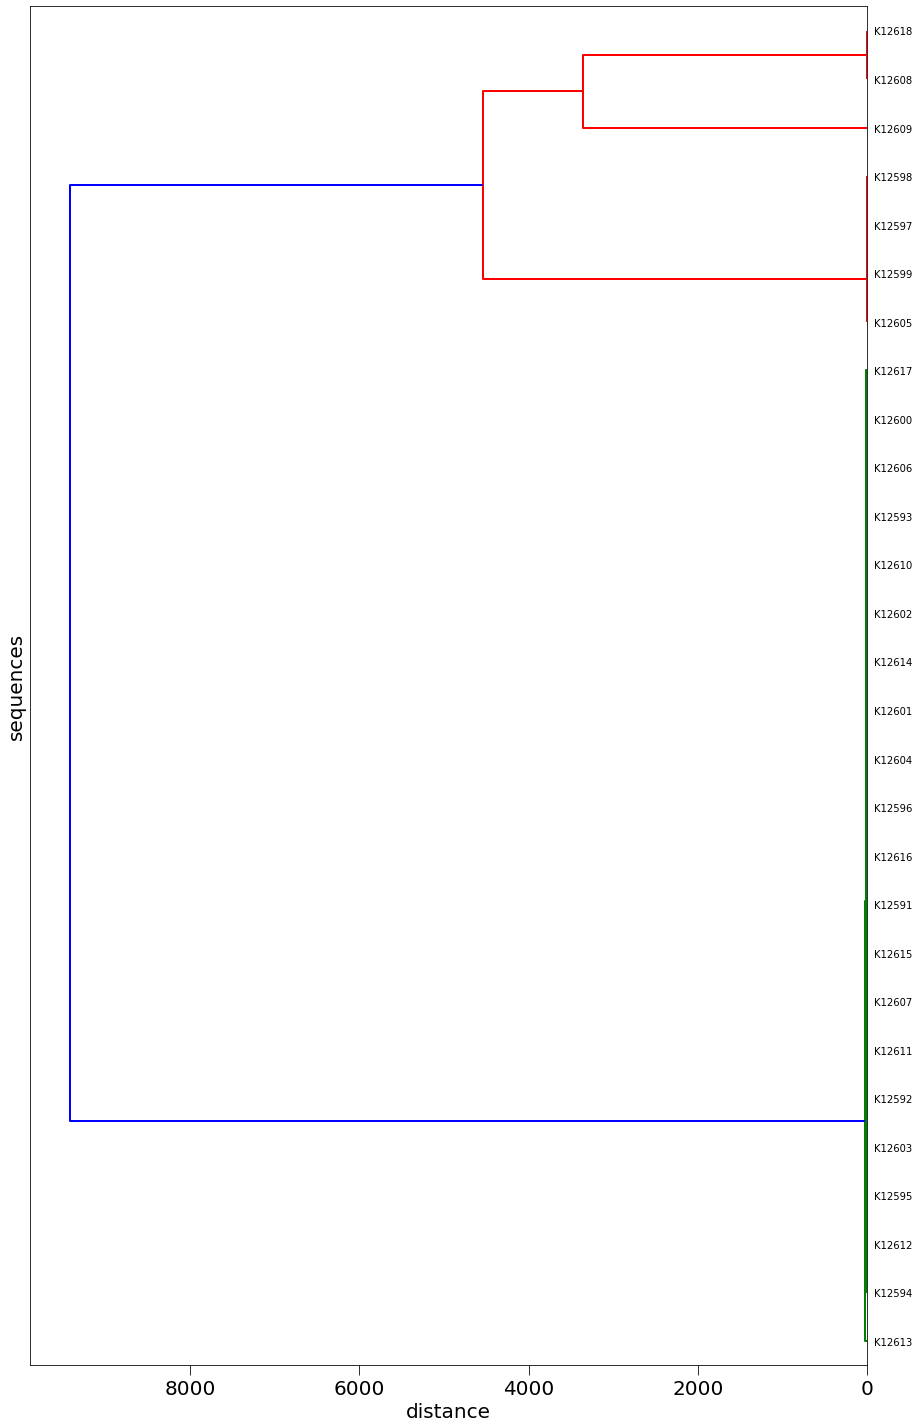

In [34]:
labelList = distance_df.columns.tolist()
plt.rcParams['lines.linewidth'] = 2 #Dendrogram line with
plt.rcParams['xtick.major.size'] = 10 #Only affect to tick (line) size
plt.rcParams.update({'font.size': 20}) #Increase x tick label size
#plt.tick_params(labelsize=30)
plt.figure(figsize=(15, 25))
plt.ylabel('sequences', fontsize=20)
plt.xlabel('distance', fontsize=20)

dendro = hierarchy.dendrogram(Z, labels=labelList, orientation='left', distance_sort='descending', show_leaf_counts=True, leaf_font_size=10)


In [35]:
tree = hierarchy.to_tree(Z, False)

In [36]:
leafIndex = tree.pre_order()
leafIndex

[22,
 3,
 21,
 4,
 12,
 1,
 20,
 16,
 24,
 0,
 25,
 5,
 13,
 10,
 23,
 11,
 19,
 2,
 15,
 9,
 26,
 14,
 8,
 6,
 7,
 18,
 17,
 27]

In [37]:
leafNames = distance_df.columns.tolist()
leafNames

['K12591',
 'K12592',
 'K12593',
 'K12594',
 'K12595',
 'K12596',
 'K12597',
 'K12598',
 'K12599',
 'K12600',
 'K12601',
 'K12602',
 'K12603',
 'K12604',
 'K12605',
 'K12606',
 'K12607',
 'K12608',
 'K12609',
 'K12610',
 'K12611',
 'K12612',
 'K12613',
 'K12614',
 'K12615',
 'K12616',
 'K12617',
 'K12618']

In [39]:
max_d = 30
leafCluster = hierarchy.fcluster(Z, max_d, criterion='distance')
unique, counts = np.unique(leafCluster, return_counts=True)
dict(zip(unique, counts))

{1: 21, 2: 4, 3: 2, 4: 1}

In [40]:
nodes = []
for leaf, group in zip(leafNames, leafCluster):
    nodes.append(dict(id = leaf, group = group))

In [41]:
nodes

[{'id': 'K12591', 'group': 1},
 {'id': 'K12592', 'group': 1},
 {'id': 'K12593', 'group': 1},
 {'id': 'K12594', 'group': 1},
 {'id': 'K12595', 'group': 1},
 {'id': 'K12596', 'group': 1},
 {'id': 'K12597', 'group': 2},
 {'id': 'K12598', 'group': 2},
 {'id': 'K12599', 'group': 2},
 {'id': 'K12600', 'group': 1},
 {'id': 'K12601', 'group': 1},
 {'id': 'K12602', 'group': 1},
 {'id': 'K12603', 'group': 1},
 {'id': 'K12604', 'group': 1},
 {'id': 'K12605', 'group': 2},
 {'id': 'K12606', 'group': 1},
 {'id': 'K12607', 'group': 1},
 {'id': 'K12608', 'group': 3},
 {'id': 'K12609', 'group': 4},
 {'id': 'K12610', 'group': 1},
 {'id': 'K12611', 'group': 1},
 {'id': 'K12612', 'group': 1},
 {'id': 'K12613', 'group': 1},
 {'id': 'K12614', 'group': 1},
 {'id': 'K12615', 'group': 1},
 {'id': 'K12616', 'group': 1},
 {'id': 'K12617', 'group': 1},
 {'id': 'K12618', 'group': 3}]

### Construct a nested dictionary representing the dendrogram
https://stackoverflow.com/questions/19964266/scipy-dendrogram-to-json-for-d3-js-tree-visualisation

In [42]:
# Create a nested dictionary from the ClusterNode's returned by SciPy
def add_node(node, parent):
    # First create the new node and append it to its parent's children
    newNode = dict( node_id=node.id, children=[] )
    parent["children"].append( newNode )

    # Recursively add the current node's children
    if node.left: add_node( node.left, newNode )
    if node.right: add_node( node.right, newNode )

In [43]:
# Create a nested dictionary from the ClusterNode's returned by SciPy
data = {}
data["links"] = []
def iternode(node, leafNames, leafIndex):
    # First create the new node and append it to its parent's children
    def checkname(nodeid):
        if nodeid in leafIndex:
            return leafNames[nodeid]
        else:
            return "NODE_" + str(nodeid)
    
    if node.left: 
        data["links"].append(dict(source = checkname(node.id), target = checkname(node.left.id), distance= int(round(node.dist))))
        iternode(node.left, leafNames, leafIndex )
    if node.right:
        data["links"].append(dict(source = checkname(node.id), target = checkname(node.right.id), distance= int(round(node.dist))))
        iternode(node.right, leafNames, leafIndex )

In [44]:
iternode(tree, leafNames, leafIndex)

In [45]:
data['links']

[{'source': 'NODE_54', 'target': 'NODE_51', 'distance': 9419},
 {'source': 'NODE_51', 'target': 'K12613', 'distance': 28},
 {'source': 'NODE_51', 'target': 'NODE_50', 'distance': 28},
 {'source': 'NODE_50', 'target': 'NODE_48', 'distance': 14},
 {'source': 'NODE_48', 'target': 'K12594', 'distance': 11},
 {'source': 'NODE_48', 'target': 'NODE_45', 'distance': 11},
 {'source': 'NODE_45', 'target': 'K12612', 'distance': 9},
 {'source': 'NODE_45', 'target': 'NODE_42', 'distance': 9},
 {'source': 'NODE_42', 'target': 'NODE_31', 'distance': 8},
 {'source': 'NODE_31', 'target': 'K12595', 'distance': 5},
 {'source': 'NODE_31', 'target': 'K12603', 'distance': 5},
 {'source': 'NODE_42', 'target': 'NODE_41', 'distance': 8},
 {'source': 'NODE_41', 'target': 'K12592', 'distance': 7},
 {'source': 'NODE_41', 'target': 'K12611', 'distance': 7},
 {'source': 'NODE_50', 'target': 'NODE_49', 'distance': 14},
 {'source': 'NODE_49', 'target': 'NODE_46', 'distance': 12},
 {'source': 'NODE_46', 'target': 'NOD

In [46]:
nodelist = []
for i in data['links']:
    if not i['source'] in nodelist:
        nodelist.append(i['source'])
        nodes.append(dict(id = i['source'], group = 0))

In [47]:
nodes

[{'id': 'K12591', 'group': 1},
 {'id': 'K12592', 'group': 1},
 {'id': 'K12593', 'group': 1},
 {'id': 'K12594', 'group': 1},
 {'id': 'K12595', 'group': 1},
 {'id': 'K12596', 'group': 1},
 {'id': 'K12597', 'group': 2},
 {'id': 'K12598', 'group': 2},
 {'id': 'K12599', 'group': 2},
 {'id': 'K12600', 'group': 1},
 {'id': 'K12601', 'group': 1},
 {'id': 'K12602', 'group': 1},
 {'id': 'K12603', 'group': 1},
 {'id': 'K12604', 'group': 1},
 {'id': 'K12605', 'group': 2},
 {'id': 'K12606', 'group': 1},
 {'id': 'K12607', 'group': 1},
 {'id': 'K12608', 'group': 3},
 {'id': 'K12609', 'group': 4},
 {'id': 'K12610', 'group': 1},
 {'id': 'K12611', 'group': 1},
 {'id': 'K12612', 'group': 1},
 {'id': 'K12613', 'group': 1},
 {'id': 'K12614', 'group': 1},
 {'id': 'K12615', 'group': 1},
 {'id': 'K12616', 'group': 1},
 {'id': 'K12617', 'group': 1},
 {'id': 'K12618', 'group': 3},
 {'id': 'NODE_54', 'group': 0},
 {'id': 'NODE_51', 'group': 0},
 {'id': 'NODE_50', 'group': 0},
 {'id': 'NODE_48', 'group': 0},
 {'i

In [49]:
distance_df.head()

,K12591,K12592,K12593,K12594,K12595,K12596,K12597,K12598,K12599,K12600,K12601,K12602,K12603,K12604,K12605,K12606,K12607,K12608,K12609,K12610,K12611,K12612,K12613,K12614,K12615,K12616,K12617,K12618
K12591,0.0,5.0,4.0,7.0,6.0,2.0,1932.0,1932.0,1932.0,5.0,1.0,2.0,5.0,2.0,1932.0,2.0,3.0,1915.0,1932.0,2.0,4.0,5.0,9.0,1.0,2.0,1.0,4.0,1914.0
K12592,5.0,0.0,3.0,4.0,3.0,5.0,1932.0,1932.0,1932.0,6.0,6.0,5.0,4.0,5.0,1932.0,3.0,6.0,1915.0,1932.0,3.0,3.0,4.0,10.0,6.0,7.0,4.0,9.0,1914.0
K12593,4.0,3.0,0.0,5.0,2.0,2.0,1932.0,1932.0,1932.0,3.0,3.0,4.0,3.0,2.0,1932.0,2.0,5.0,1915.0,1932.0,2.0,4.0,3.0,9.0,3.0,4.0,3.0,6.0,1914.0
K12594,7.0,4.0,5.0,0.0,3.0,7.0,1932.0,1932.0,1932.0,8.0,6.0,5.0,2.0,5.0,1932.0,5.0,6.0,1915.0,1931.0,7.0,5.0,6.0,8.0,6.0,7.0,8.0,9.0,1914.0
K12595,6.0,3.0,2.0,3.0,0.0,4.0,1932.0,1932.0,1932.0,5.0,5.0,4.0,1.0,4.0,1932.0,4.0,7.0,1915.0,1932.0,4.0,2.0,3.0,11.0,5.0,6.0,5.0,8.0,1914.0


# Create the minimum spanning tree.

In [50]:
X = csr_matrix(distance_df)

In [51]:
X

<28x28 sparse matrix of type '<class 'numpy.float64'>'
	with 754 stored elements in Compressed Sparse Row format>

In [52]:
# Create the minimum spanning tree.
mst = minimum_spanning_tree(X)
mst = mst.toarray().astype(int)

In [53]:
mst

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    2,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    

In [54]:
mst_df = pd.DataFrame(mst, index=distance_df.index, columns=distance_df.index)

In [55]:
mst_df

,K12591,K12592,K12593,K12594,K12595,K12596,K12597,K12598,K12599,K12600,K12601,K12602,K12603,K12604,K12605,K12606,K12607,K12608,K12609,K12610,K12611,K12612,K12613,K12614,K12615,K12616,K12617,K12618
K12591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K12592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K12593,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K12594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K12595,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
K12596,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K12597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
K12598,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K12599,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
K12600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
mst_df_pw = mst_df.stack().reset_index(name='distance').rename(columns={'level_0': 'source', 'level_1': 'target'})

In [67]:
mst_df_pw.head(50)

,source,target,distance
0,K12591,K12591,0
1,K12591,K12592,0
2,K12591,K12593,0
3,K12591,K12594,0
4,K12591,K12595,0
5,K12591,K12596,0
6,K12591,K12597,0
7,K12591,K12598,0
8,K12591,K12599,0
9,K12591,K12600,0


In [70]:
pairwise_distance[(pairwise_distance.sample_1 != pairwise_distance.sample_2) & (pairwise_distance.distance < 5)].sort_values(by=['distance', 'sample_1'])

,sample_1,sample_2,distance
303,K12601,K12614,0.0
654,K12614,K12601,0.0
10,K12591,K12601,1.0
23,K12591,K12614,1.0
25,K12591,K12616,1.0
124,K12595,K12603,1.0
150,K12596,K12601,1.0
163,K12596,K12614,1.0
165,K12596,K12616,1.0
175,K12597,K12598,1.0


In [58]:
mst_df_pw[(mst_df_pw)(mst_df_pw.distance > 0)].to_dict(orient='records')

[{'source': 'K12593', 'target': 'K12592', 'distance': 3},
 {'source': 'K12595', 'target': 'K12593', 'distance': 2},
 {'source': 'K12595', 'target': 'K12611', 'distance': 2},
 {'source': 'K12596', 'target': 'K12600', 'distance': 3},
 {'source': 'K12597', 'target': 'K12605', 'distance': 2},
 {'source': 'K12598', 'target': 'K12597', 'distance': 1},
 {'source': 'K12599', 'target': 'K12598', 'distance': 2},
 {'source': 'K12601', 'target': 'K12591', 'distance': 1},
 {'source': 'K12601', 'target': 'K12596', 'distance': 1},
 {'source': 'K12601', 'target': 'K12615', 'distance': 1},
 {'source': 'K12603', 'target': 'K12594', 'distance': 2},
 {'source': 'K12603', 'target': 'K12595', 'distance': 1},
 {'source': 'K12604', 'target': 'K12606', 'distance': 2},
 {'source': 'K12606', 'target': 'K12602', 'distance': 2},
 {'source': 'K12608', 'target': 'K12618', 'distance': 2},
 {'source': 'K12609', 'target': 'K12598', 'distance': 1874},
 {'source': 'K12610', 'target': 'K12593', 'distance': 2},
 {'source':

# DISTANCE TO GROUP

In [60]:
pairwise_distance.head()

,sample_1,sample_2,distance
0,K12591,K12591,0.0
1,K12591,K12592,5.0
2,K12591,K12593,4.0
3,K12591,K12594,7.0
4,K12591,K12595,6.0


In [61]:
pairwise_distance[(pairwise_distance.sample_1 != pairwise_distance.sample_2) & (pairwise_distance.distance <= 5)]

,sample_1,sample_2,distance
2,K12591,K12593,4.0
5,K12591,K12596,2.0
10,K12591,K12601,1.0
11,K12591,K12602,2.0
13,K12591,K12604,2.0
15,K12591,K12606,2.0
16,K12591,K12607,3.0
19,K12591,K12610,2.0
20,K12591,K12611,4.0
23,K12591,K12614,1.0


In [62]:
def pairwise_to_cluster(pw,threshold = 5):
    groups = {}
    sorted_df = pw[(pw.sample_1 != pw.sample_2) & (pw.distance <= threshold)].sort_values(by=['distance'])
    
    def rename_dict_clusters(cluster_dict):
        reordered_dict = {}
        for i, k in enumerate(list(cluster_dict)):
            reordered_dict[i] = cluster_dict[k]
        return reordered_dict
    
    def regroup_clusters(list_keys, groups_dict, both_samples_list):
        #sum previous clusters
        list_keys.sort()
        new_cluster = sum([groups_dict[key] for key in list_keys], [])
        #add new cluster
        cluster_asign = list(set(new_cluster + both_samples_list))
        #Remove duped cluster
        first_cluster = list_keys[0]
        groups_dict[first_cluster] = cluster_asign
        rest_cluster = list_keys[1:]
        for key in rest_cluster:
            del groups_dict[key]
        groups_dict = rename_dict_clusters(groups_dict)
        return groups_dict
        
    for index, row in sorted_df.iterrows():
        group_number = len(groups)
        cluster_name = 'cluster_' + str(group_number)

        sample_1 = str(row.sample_1)
        sample_2 = str(row.sample_2)
        both_samples_list = row[0:2].tolist()
                
        if group_number == 0:
            groups[group_number] = both_samples_list
        
        all_samples_dict = sum(groups.values(), [])
                
        if sample_1 in all_samples_dict or sample_2 in all_samples_dict:
            #extract cluster which have the new samples
            key_with_sample = {key for (key,value) in groups.items() if (sample_1 in value or sample_2 in value)}
            
            cluster_with_sample = list(key_with_sample)
            cluster_with_sample_name = cluster_with_sample[0]
            number_of_shared_clusters = len(key_with_sample)
            if number_of_shared_clusters > 1:
                groups = regroup_clusters(cluster_with_sample, groups, both_samples_list)
            else:
                groups[cluster_with_sample_name] = list(set(groups[cluster_with_sample_name] + both_samples_list))
        else:
            groups[group_number] = both_samples_list
            
    for index, row in pw[(pw.sample_1 != pw.sample_2) & (pw.distance > threshold)].iterrows():
        sample_1 = str(row.sample_1)
        sample_2 = str(row.sample_2)
        all_samples_dict = sum(groups.values(), [])
        if sample_1 not in all_samples_dict:
            group_number = len(groups)
            groups[group_number] = [sample_1]
        
        if sample_2 not in all_samples_dict:
            group_number = len(groups)
            groups[group_number] = [sample_2]
            
    cluster_df = pd.DataFrame(groups.values(),index=list(groups))
    
    cluster_df_return = cluster_df.stack().droplevel(1).reset_index().rename(columns={'index': 'group', 0: 'id'})
            
    return cluster_df_return


In [63]:
pairwise_to_cluster(pairwise_distance, 20)

,group,id
0,0,K12614
1,0,K12616
2,0,K12595
3,0,K12617
4,0,K12601
5,0,K12600
6,0,K12612
7,0,K12593
8,0,K12602
9,0,K12611


In [65]:
distance_df.shape

(28, 28)

In [66]:
pairwise_distance[(pairwise_distance.sample_1 == 'K12609') & (pairwise_distance.distance <= 10)]

,sample_1,sample_2,distance
522,K12609,K12609,0.0
